# Taller de Física Computacional

Carlos Ruestes / Cristián Sánchez - Taller de Física Computacional - FCEN - UNCUYO

# Machete de NumPy

Las listas en Python son contenedores abstractos que pueden contener estructuras de datos de cualquier tipo, números, cadenas, otras listas, etc.. Esa versatilidad tiene un problema. Las hace **lentas**. Si bien es posible utilizar listas para almacenar objetos tales como vectores, matrices o arreglos multidimensionales no son la estructura de datos ideal. Esto es porque los vectores o matrices que podemos necesitar en física computacional son, en general, de elementos que tienen todos el mismo tipo: números reales por ejemplo. El que los elementos sean del mismo tipo implica un acceso más rápido. Para lograr ese acceso rápido el objeto `ndarray` de Numpy almacena los datos numéricos en una sección de memoria única en direcciones contiguas. 

La estructura `ndarray` y las rutinas para su manipulación implementadas en el paquete NumPy proporcionan la base para poder trabajar en Python con arreglos multidimensionales de forma eficiente. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

## Formas de crear arreglos

In [2]:
n = 3

In [3]:
a = np.empty((n,n)) # Arreglo vacío no inicializado, matrix de 3x3
a

array([[6.90251741e-310, 4.67960520e-310, 6.90251524e-310],
       [6.90251524e-310, 6.90251524e-310, 6.90251526e-310],
       [6.90251524e-310, 4.67960412e-310, 3.95252517e-322]])

In [4]:
b = np.zeros((n,n)) # Arreglo inicializado con ceros
b

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [5]:
c = np.zeros_like(b) # Arreglo inicializado a cero con la misma forma de b
c

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
d = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]]) # conversión de una lista a un ndarray
d

array([[1., 2., 3.],
       [4., 5., 6.]])

In [7]:
e = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]],dtype=complex) # establecemos el tipo de datos explícitamente
e

array([[1.+0.j, 2.+0.j, 3.+0.j],
       [4.+0.j, 5.+0.j, 6.+0.j]])

In [8]:
f = np.arange(0,10,0.1) # vector de números equiespaciados en 0.1 entre 0 y 10
f

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [9]:
g = np.linspace(0,2*np.pi,10) # vector de 10 elementos equiespaciados entre 0 y 2*pi
g

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [10]:
o = np.random.rand(3,3) # matriz 3x3 de números aleatorios
o

array([[0.62533066, 0.70661762, 0.87974499],
       [0.06604833, 0.20896668, 0.71283157],
       [0.95515284, 0.22831455, 0.95616021]])

## Formas de acceder y asignar los elementos de un arreglo

In [11]:
a = np.random.rand(3,3)

In [12]:
a

array([[0.94955725, 0.1093258 , 0.29438235],
       [0.16535999, 0.69297157, 0.95983231],
       [0.59130233, 0.72623321, 0.56235094]])

Acceso y asignación por índices

In [57]:
a[0,0]

0.13194241519360572

In [56]:
a[2,1]

-0.1259271165852366

In [15]:
a[0,0] = 1.0

In [16]:
a[2,1] = 1.0

Acceso y asignación por *slices*

In [58]:
a[:,2]

array([-0.16883317, -0.26796888,  0.36835231])

In [59]:
a[2,:]

array([-0.39289286, -0.12592712,  0.36835231])

In [60]:
a[0:1,:]

array([[ 0.13194242, -0.19999111, -0.16883317]])

In [20]:
a

array([[1.        , 0.1093258 , 0.29438235],
       [0.16535999, 0.69297157, 0.95983231],
       [0.59130233, 1.        , 0.56235094]])

In [21]:
a[:,2] = 1.0

In [22]:
a[2,:] = 5.0

## Vectorización, operaciones entre arreglos y funciones de arreglos

In [23]:
# dos matrices 3x3 de números aleatorios entre cero y uno
a = np.random.rand(3,3)
b = np.random.rand(3,3)

In [24]:
a

array([[0.44950763, 0.84413839, 0.46908833],
       [0.19922267, 0.00124474, 0.1798567 ],
       [0.48376958, 0.99187181, 0.65809576]])

In [25]:
b

array([[3.68515728e-01, 2.51502002e-01, 5.63114869e-01],
       [4.53660221e-04, 9.41314177e-02, 7.82884452e-01],
       [9.48955588e-01, 3.13489570e-01, 2.98075036e-01]])

In [26]:
# multiplicar por dos cada elemento de a
2 * a

array([[0.89901527, 1.68827678, 0.93817666],
       [0.39844535, 0.00248947, 0.35971339],
       [0.96753916, 1.98374362, 1.31619151]])

In [27]:
# sumar 3j a cada elemento de a, notar la transformación de tipo
a + 3.0j

array([[0.44950763+3.j, 0.84413839+3.j, 0.46908833+3.j],
       [0.19922267+3.j, 0.00124474+3.j, 0.1798567 +3.j],
       [0.48376958+3.j, 0.99187181+3.j, 0.65809576+3.j]])

In [28]:
# suma de a y b
a + b

array([[0.81802336, 1.09564039, 1.0322032 ],
       [0.19967633, 0.09537615, 0.96274115],
       [1.43272517, 1.30536138, 0.95617079]])

In [29]:
# resta de a y b
a - b

array([[ 0.08099191,  0.59263639, -0.09402654],
       [ 0.19876901, -0.09288668, -0.60302776],
       [-0.46518601,  0.67838224,  0.36002072]])

In [30]:
# producto ELEMENTO A ELEMENTO entre a y b
a * b

array([[1.65650633e-01, 2.12302495e-01, 2.64150612e-01],
       [9.03794018e-05, 1.17168846e-04, 1.40807011e-01],
       [4.59075845e-01, 3.10941467e-01, 1.96161916e-01]])

In [31]:
# producto matricial de a y b
a @ b

array([[0.61117758, 0.33956631, 1.05381077],
       [0.24409327, 0.10660527, 0.16677053],
       [0.80323032, 0.42134147, 1.24510078]])

In [32]:
# otra forma de expresar el producto matricial de a y b
a.dot(b)

array([[0.61117758, 0.33956631, 1.05381077],
       [0.24409327, 0.10660527, 0.16677053],
       [0.80323032, 0.42134147, 1.24510078]])

In [33]:
# otra forma mas de expresar el producto matricial de a y b
np.dot(a,b)

array([[0.61117758, 0.33956631, 1.05381077],
       [0.24409327, 0.10660527, 0.16677053],
       [0.80323032, 0.42134147, 1.24510078]])

In [34]:
# seno elemento a elemento
np.sin(a)

array([[0.43452213, 0.74739896, 0.45207328],
       [0.19790744, 0.00124474, 0.17888858],
       [0.46511948, 0.83705156, 0.6116114 ]])

In [35]:
# loraritmo elemento a elemento
np.log(b)

array([[-0.99827189, -1.38030433, -0.57427164],
       [-7.69816205, -2.36306341, -0.24477016],
       [-0.05239328, -1.15998919, -1.21041003]])

In [36]:
# matriz transpuesta
a.T

array([[0.44950763, 0.19922267, 0.48376958],
       [0.84413839, 0.00124474, 0.99187181],
       [0.46908833, 0.1798567 , 0.65809576]])

In [37]:
# suma de todos los elementos de a
np.sum(a)

4.276795603638426

In [38]:
# vector con los elementos diagonales de a
a.diagonal()

array([0.44950763, 0.00124474, 0.65809576])

In [39]:
a

array([[0.44950763, 0.84413839, 0.46908833],
       [0.19922267, 0.00124474, 0.1798567 ],
       [0.48376958, 0.99187181, 0.65809576]])

In [40]:
# valor máximo de entre los elementos de a
a.max()

0.9918718097702064

In [41]:
# valor mínimo de entre los elementos de a
a.min()

0.0012447368683710103

In [42]:
# tupla de coordenadas del elemento máximo
np.unravel_index(np.argmax(a), a.shape)

(2, 1)

In [43]:
# media entre los elementos de a
a.mean()

0.4751995115153807

In [44]:
# suma de los elementos de a fila a fila
np.sum(a,axis=0)

array([1.13249989, 1.83725494, 1.30704078])

In [45]:
# suma de los elementos de a columna a columna
np.sum(a,axis=1)

array([1.76273435, 0.38032411, 2.13373715])

In [46]:
# transpuesta congujada de a
(a + 1j).conjugate().T

array([[0.44950763-1.j, 0.19922267-1.j, 0.48376958-1.j],
       [0.84413839-1.j, 0.00124474-1.j, 0.99187181-1.j],
       [0.46908833-1.j, 0.1798567 -1.j, 0.65809576-1.j]])

In [47]:
# ndarray de Booleanos conteniendo la evaluación de la expresión lógica elemento a elemento
a > 0.5

array([[False,  True, False],
       [False, False, False],
       [False,  True,  True]])

In [48]:
# valores de a que cumplen con la condición
a[a > 0.5]

array([0.84413839, 0.99187181, 0.65809576])

## Vectorización de funciones definidas por el usuario

In [49]:
a = np.random.rand(3,3) - 0.5

In [50]:
a

array([[ 0.13194242, -0.19999111, -0.16883317],
       [-0.32828348, -0.47975135, -0.26796888],
       [-0.39289286, -0.12592712,  0.36835231]])

Defino una función como lo hemos hecho siempre

In [51]:
def val_abs(x):
    if x >= 0.0:
        return x
    else:
        return -x

al tratar de aplicarla a un `ndarray` falla

In [52]:
val_abs(a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

la función `numpy.vectorize()` me devuelve una versión *vectorizada* que puedo utilizar con argumentos de tipo `ndarray`

In [ ]:
vec_abs = np.vectorize(val_abs)

In [61]:
vec_abs(a)

NameError: name 'vec_abs' is not defined

## Siempre que sea posible usar operaciones vectorizadas

In [62]:
a = np.random.rand(1000,1000) - 0.5
b = np.random.rand(1000,1000) - 0.5
c = np.zeros_like(a)

In [63]:
%%timeit
for i in range(1000):
    for j in range(1000):
        c[i,j] = m.cos(a[i,j]) + m.sin(b[j,i])

734 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
%%timeit
c = np.cos(a) + np.sin(b.T)

24.6 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Notar que la versión vectorizada es 100 veces más rápida!

## Algunos gráficos

Utilizando Numpy y sus herramientas para generar arreglos y aplicarles funciones se facilita enormemente la creación de gráficos, entre muuuuchas otras operaciones. Si utilizaramos listas deberíamos (como lo hicimos antes) escribir bucles para operar elemento a elemento. La potente interfaz vectorial de numpy permite generar código complejo de forma elegante y legible.

In [65]:
x = np.linspace(0,15*m.pi,1000)
y = np.exp(-0.1*x)*np.sin(5*x)

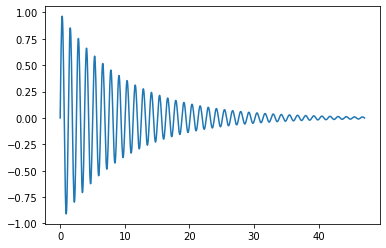

In [66]:
plt.plot(x,y)

La función `numpy.meshgrid()` permite obtener dos matrices que contienen los valores de las coordenadas x e y en una grilla dimensional a partir de un par de vectores conteniendo los valores de x e y en los ejes. Esto me permite generar luego, sobre esa greilla los valores de una función de dos variables y graficarla.

In [67]:
x = np.linspace(0, 2*m.pi, 500)
y = np.linspace(0, 2*m.pi, 500)  
xm, ym = np.meshgrid(x, y)

In [68]:
z = np.sin(xm)**10 + np.cos(10 + ym*xm) * np.cos(xm)

El siguiente es un gráfico de contornos

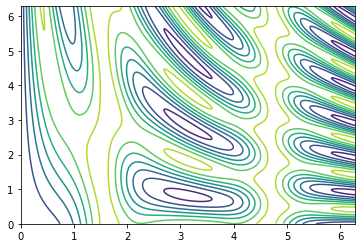

In [69]:
plt.contour(x, y, z)

El siguiente es un gráfico de contornos llenos

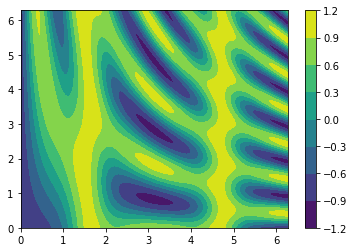

In [70]:
plt.contourf(x, y, z)
plt.colorbar()

La función `streamplot` permite hacer gráficos de funciones vectoriales.

In [72]:
x = np.linspace(-m.pi, m.pi, 300)
y = np.linspace(-m.pi, m.pi, 300)  
xm, ym = np.meshgrid(x, y)

In [73]:
u = -1 - xm**2 + ym
v = 1 + xm - ym**2
speed = np.sqrt(u*u + y*y)

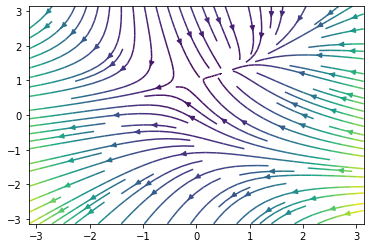

In [74]:
plt.streamplot(xm,ym,u,v,color=speed)